## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
#study_results
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Data Types
mouse_metadata.dtypes
#study_results.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [3]:
# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
#combine_data_df['Mouse ID'].count
number_mice = len(combined_data_df['Mouse ID'].unique())
number_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_id_time = combined_data_df.loc[combined_data_df[['Mouse ID', 'Timepoint']].duplicated(keep=False)] 
duplicated_mice_id_time['Mouse ID'].value_counts()

g989    10
Name: Mouse ID, dtype: int64

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
total_data_mouse_id = combined_data_df.loc[combined_data_df['Mouse ID'] == "g989" ] 
total_data_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf_no_2x_mouse_id = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989"]
cleandf_no_2x_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleandf = len(cleandf_no_2x_mouse_id['Mouse ID'].unique())
number_mice_cleandf

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_groupby = cleandf_no_2x_mouse_id.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_mean = round(drug_regimen_groupby['Tumor Volume (mm3)'].mean(), 2)
drug_regimen_median = round(drug_regimen_groupby['Tumor Volume (mm3)'].median(), 2)
drug_regimen_variance = round(drug_regimen_groupby['Tumor Volume (mm3)'].var(), 2)
drug_regimen_std = round(drug_regimen_groupby['Tumor Volume (mm3)'].std(), 2)
drug_regimen_sem = round(drug_regimen_groupby['Tumor Volume (mm3)'].sem(), 2)

# Assemble the resulting series into a single summary dataframe.
summary_data_df = pd.DataFrame({'Mean' : drug_regimen_mean, 'Meadian' : drug_regimen_median, 'Variance' : drug_regimen_variance, 'Standard Deviation' : drug_regimen_std, 'SEM value' : drug_regimen_sem})
summary_data_df

,Mean,Meadian,Variance,Standard Deviation,SEM value
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_data_df = drug_regimen_groupby['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem']).round(2)
agg_summary_data_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

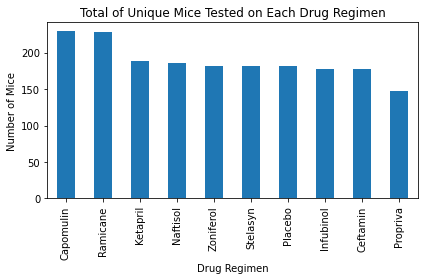

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = drug_regimen_groupby['Mouse ID'].count().sort_values(ascending=False)

unique_mice_df = pd.DataFrame(unique_mice)
unique_mice_df.plot(kind='bar', legend=False)

plt.title("Total of Unique Mice Tested on Each Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

Text(23.875, 0.5, 'Number of Mice')

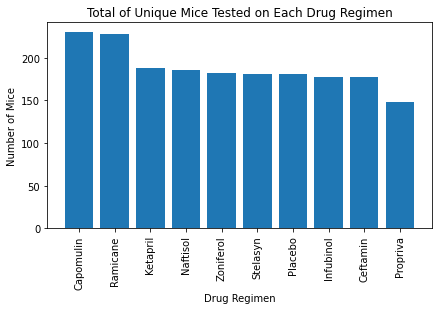

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure()
plt.bar(unique_mice.index, unique_mice)
plt.xticks(rotation = "vertical")
plt.tight_layout()

# labels and Title
plt.title("Total of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


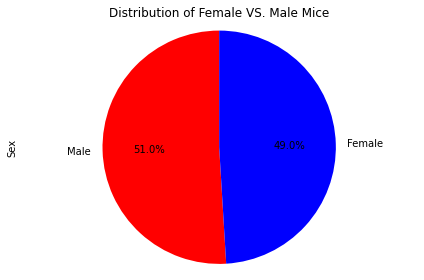

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['r', 'b']
mice_piechart = cleandf_no_2x_mouse_id['Sex'].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%",  colors=colors)
plt.title("Distribution of Female VS. Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.tight_layout()




<ipython-input-32-5ab66f128173>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,


(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

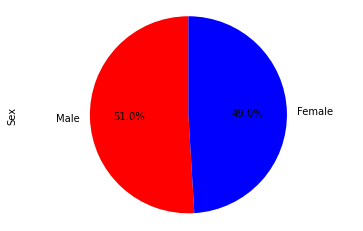

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [cleandf_no_2x_mouse_id['Sex'].value_counts()]
labels = ["Male", "Female"]
colors = ['r', 'b']
explode = [0, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.ylabel("Sex")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_treatment_reg_time = cleandf_no_2x_mouse_id.groupby('Mouse ID')

four_treatment_reg_max_time = pd.DataFrame(four_treatment_reg_time['Timepoint'].max())
 
four_treatment_reg_max_time = four_treatment_reg_max_time.reset_index()
#four_treatment_reg_max_time


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
total_of_timepoint_merge = pd.merge(four_treatment_reg_max_time, cleandf_no_2x_mouse_id, on=['Mouse ID','Timepoint'], how='inner').sort_values('Timepoint')
total_of_timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
21,b447,0,45.000000,0,Ceftamin,Male,2,30
223,x226,0,45.000000,0,Ceftamin,Male,23,28
60,f932,0,45.000000,0,Ketapril,Male,15,29
225,x336,0,45.000000,0,Naftisol,Female,4,29
114,l872,0,45.000000,0,Placebo,Male,19,30
...,...,...,...,...,...,...,...,...
103,k894,45,60.752704,4,Zoniferol,Female,13,29
106,l471,45,67.748662,1,Ceftamin,Female,7,28
108,l509,45,41.483008,3,Capomulin,Male,17,21
76,i177,45,33.562402,3,Ramicane,Male,10,18


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
